In [25]:
pip install rasterio

     --------------------------------------- 22.1/22.1 MB 16.8 MB/s eta 0:00:00
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached affine-2.3.1-py2.py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio

In [28]:
#define variables
username= "XXXX"
password= "XXX"

In [29]:
#setting up connection
api = SentinelAPI(username, password, 'https://scihub.copernicus.eu/dhus')

In [30]:
#reading shapefile  ##put the directory of shapefile as parameter
shapefile = gpd.read_file("C:/Users/em104588/Documents/DL/R_Paramo-Tempra.shp")

<AxesSubplot: >

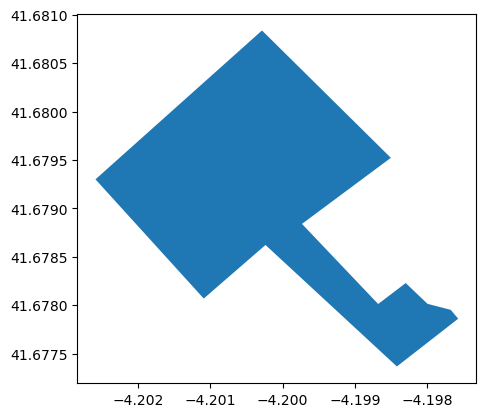

In [31]:
%matplotlib inline
shapefile.plot()

In [32]:
#simplifying the geometry for easy use & converting shapefile to geojson
shape = gpd.GeoSeries(shapefile['geometry'])
simplifiedShape = shape.simplify(1)
jsonShape = simplifiedShape.__geo_interface__

In [33]:
#query over api to find the imagery
footprint = geojson_to_wkt(jsonShape)

In [47]:
# search by polygon, time, and Hub query keywords año/mes/dia
products = api.query(footprint,
                     date = ('20160301', '20181031'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 10))
#print(footprint)
#print(products)

In [48]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
b911d5e7-3754-43a5-8aaa-4f3f4d199d4a,S2A_MSIL2A_20181024T111121_N0209_R137_T30TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-10-24T11:11:21.024Z, Instrument: MS...",false,2018-10-24 21:10:30.719,2018-10-24 11:11:21.024,2018-10-24 11:11:21.024,17437,...,2015-028A,DESCENDING,Sentinel-2A,02.09,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,b911d5e7-3754-43a5-8aaa-4f3f4d199d4a,"POLYGON ((-2.88258 41.76285, -2.91068 41.68650..."
d544be82-ba5f-4bcc-8440-58e08f919881,S2A_MSIL2A_20181024T111121_N0209_R137_T30TUM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-10-24T11:11:21.024Z, Instrument: MS...",false,2018-10-24 21:19:06.738,2018-10-24 11:11:21.024,2018-10-24 11:11:21.024,17437,...,2015-028A,DESCENDING,Sentinel-2A,02.09,Level-2A,S2MSI2A,Sentinel-2,1.09 GB,d544be82-ba5f-4bcc-8440-58e08f919881,"POLYGON ((-5.43120 42.42690, -4.09685 42.44744..."
b0f1e524-8d91-49fb-b1dd-d4a184891660,S2A_MSIL2A_20181004T110911_N0208_R137_T30TVM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-10-04T11:09:11.024Z, Instrument: MS...",false,2018-10-04 16:40:18.760,2018-10-04 11:09:11.024,2018-10-04 11:09:11.024,17151,...,2015-028A,DESCENDING,Sentinel-2A,02.08,Level-2A,S2MSI2A,Sentinel-2,1.02 GB,b0f1e524-8d91-49fb-b1dd-d4a184891660,"POLYGON ((-4.02335 42.44716, -3.88266 42.41817..."
b4642007-39de-4e40-9d9d-a82b36d923a1,S2B_MSIL2A_20180929T110829_N0208_R137_T30TUM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-09-29T11:08:29.024Z, Instrument: MS...",false,2018-09-29 19:02:59.933,2018-09-29 11:08:29.024,2018-09-29 11:08:29.024,8171,...,2017-013A,DESCENDING,Sentinel-2B,02.08,Level-2A,S2MSI2A,Sentinel-2,1.11 GB,b4642007-39de-4e40-9d9d-a82b36d923a1,"POLYGON ((-5.43120 42.42690, -4.09685 42.44744..."
edca9175-c3df-45cd-af9b-454f69e88dfe,S2A_MSIL2A_20181004T110911_N0208_R137_T30TUM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-10-04T11:09:11.024Z, Instrument: MS...",false,2018-10-04 16:40:18.196,2018-10-04 11:09:11.024,2018-10-04 11:09:11.024,17151,...,2015-028A,DESCENDING,Sentinel-2A,02.08,Level-2A,S2MSI2A,Sentinel-2,1.09 GB,edca9175-c3df-45cd-af9b-454f69e88dfe,"POLYGON ((-5.43120 42.42690, -4.09685 42.44744..."
292b926f-7f99-4333-ba79-637ee3e7e81e,S2A_MSIL2A_20180924T110801_N0208_R137_T30TUM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-09-24T11:08:01.024Z, Instrument: MS...",false,2018-09-24 19:16:32.475,2018-09-24 11:08:01.024,2018-09-24 11:08:01.024,17008,...,2015-028A,DESCENDING,Sentinel-2A,02.08,Level-2A,S2MSI2A,Sentinel-2,1.11 GB,292b926f-7f99-4333-ba79-637ee3e7e81e,"POLYGON ((-5.43120 42.42690, -4.09685 42.44744..."
f4e4ac7f-ec8a-4f28-8ed4-01440a521b06,S2B_MSIL2A_20180919T110719_N0208_R137_T30TUM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-09-19T11:07:19.024Z, Instrument: MS...",false,2018-09-19 23:14:55.684,2018-09-19 11:07:19.024,2018-09-19 11:07:19.024,8028,...,2017-013A,DESCENDING,Sentinel-2B,02.08,Level-2A,S2MSI2A,Sentinel-2,1.11 GB,f4e4ac7f-ec8a-4f28-8ed4-01440a521b06,"POLYGON ((-5.431

In [49]:
#Download all results from the search at once if you wish
api.download_all(products)

Fetching archival status:  62%|######1   | 8/13 [00:02<00:01,  3.92product/s]

LTA retrieval:   0%|          | 0/13 [00:00<?, ?product/s]

MD5 checksumming:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

ResultTuple(downloaded={'3f191657-d155-4e11-b9a1-19c062f2569d': {'id': '3f191657-d155-4e11-b9a1-19c062f2569d', 'title': 'S2A_MSIL2A_20180914T110651_N0208_R137_T30TVM_20180914T143036', 'size': 1174663908, 'md5': '02f2f318c4f7a4469923cf9128e00ff7', 'date': datetime.datetime(2018, 9, 14, 11, 6, 51, 24000), 'footprint': 'POLYGON((-2.882518658723742 41.793997865151916,-2.912708490292455 41.71296530418237,-2.966999430773831 41.56682286524863,-3.005785309474283 41.463116187520974,-4.197824795307051 41.4575152063026,-4.216483314982393 42.44623570214159,-2.881305826376432 42.452629745736225,-2.882518658723742 41.793997865151916))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('3f191657-d155-4e11-b9a1-19c062f2569d')/$value", 'Online': True, 'Creation Date': datetime.datetime(2018, 9, 14, 23, 37, 28, 648000), 'Ingestion Date': datetime.datetime(2018, 9, 14, 23, 16, 35, 338000), 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('3f191657-d155-4e11-b9a1-19c062f256

In [44]:
api.download("9dbe95e3-34ce-40b0-b8f8-a377fb14c8c6")

MD5 checksumming:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

{'id': '9dbe95e3-34ce-40b0-b8f8-a377fb14c8c6',
 'title': 'S2A_MSIL2A_20220526T110631_N0400_R137_T30TUM_20220526T172117',
 'size': 1212170557,
 'md5': '217188e0b02967cc1c64ef6276afe6da',
 'date': datetime.datetime(2022, 5, 26, 11, 6, 31, 24000),
 'footprint': 'POLYGON((-5.431196267197119 42.42690168750588,-4.096851684186832 42.44744302996699,-4.080027160170001 41.458681613653354,-5.393939163559721 41.438836285507165,-5.431196267197119 42.42690168750588))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('9dbe95e3-34ce-40b0-b8f8-a377fb14c8c6')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 5, 26, 19, 15, 2, 528000),
 'Ingestion Date': datetime.datetime(2022, 5, 26, 19, 14, 15, 623000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('9dbe95e3-34ce-40b0-b8f8-a377fb14c8c6')/Products('Quicklook')/$value",
 'path': 'S2A_MSIL2A_20220526T110631_N0400_R137_T30TUM_20220526T172117.zip',
 'downloaded_bytes': 1212170557}

In [45]:
# Open Bands 4, 3 and 2 with Rasterio
R10 = r'C:/Users/em104588/S2A_MSIL2A_20220526T110631_N0400_R137_T30TUM_20220526T172117/S2A_MSIL2A_20220526T110631_N0400_R137_T30TUM_20220526T172117.SAFE/GRANULE/L2A_T30TUM_A036170_20220526T110942/IMG_DATA/R10m'
b4 = rio.open(R10+'/T30TUM_20220526T110631_B04_10m.jp2')
b3 = rio.open(R10+'/T30TUM_20220526T110631_B03_10m.jp2')
b2 = rio.open(R10+'/T30TUM_20220526T110631_B02_10m.jp2')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [46]:
# Open b4 and b8
b4 = rio.open(R10+'/T30TUM_20220526T110631_B04_10m.jp2')
b8 = rio.open(R10+'/T30TUM_20220526T110631_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

In [ ]:
# For loop to download the objects one by one
for i in products:
    api.get_product_odata(i)
    api.download(i)